In [512]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import math 

In [513]:
data=pd.read_csv("breast_cancer_dataset.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [514]:
colnames=list(data.columns)
#colnames

In [515]:
class_labels=data['diagnosis']
class_M_data=data[data['diagnosis']=="M"]
class_B_data=data[data['diagnosis']=="B"]
ids=data['id']
data=data.drop(['id','diagnosis'],axis=1)
colnames.pop(0) #removing string columns
colnames.pop(0)

'diagnosis'

In [516]:
scale = StandardScaler()
scaled_data = scale.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = colnames)
#df

min_max = MinMaxScaler()
min_max_data = min_max.fit_transform(data)
mmdf = pd.DataFrame(min_max_data, columns = colnames)
#mmdf



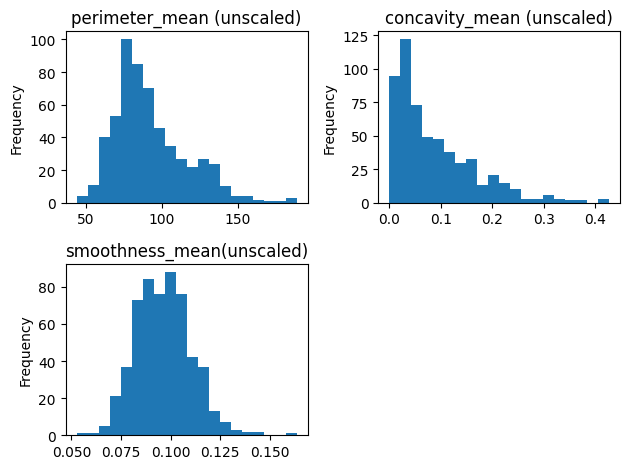

In [517]:
array_list=np.array([data["compactness_mean"].to_numpy(),data["perimeter_mean"].to_numpy(),data["concavity_worst"].to_numpy()])
#array_list

# Plot
plt.subplot(2,2,1)
plt.hist(data["perimeter_mean"], 20, histtype='bar')
plt.gca().set(title='perimeter_mean (unscaled)', ylabel='Frequency');

plt.subplot(2,2,2)
plt.hist(data["concavity_mean"], 20, histtype='bar')
plt.gca().set(title='concavity_mean (unscaled)', ylabel='Frequency');

plt.subplot(2,2,3)
plt.hist(data["smoothness_mean"], 20, histtype='bar')
plt.gca().set(title='smoothness_mean(unscaled)', ylabel='Frequency');
plt.tight_layout()

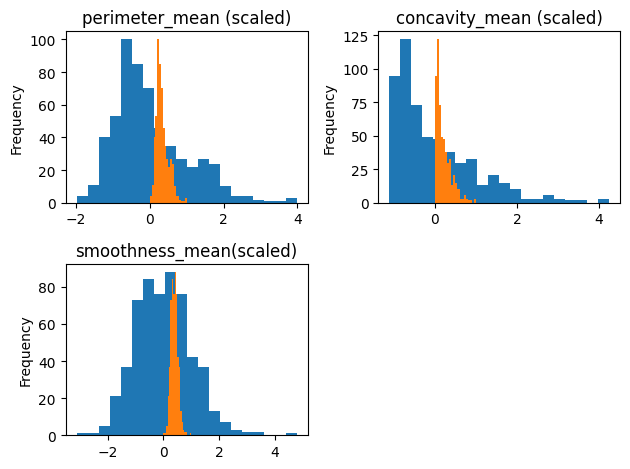

In [518]:
# Plot
plt.subplot(2,2,1)
plt.hist(df["perimeter_mean"], 20, histtype='bar')
plt.gca().set(title='perimeter_mean (scaled)', ylabel='Frequency');

plt.subplot(2,2,1)
plt.hist(mmdf["perimeter_mean"], 20, histtype='bar')
plt.gca().set(title='perimeter_mean (scaled)', ylabel='Frequency');

plt.subplot(2,2,2)
plt.hist(df["concavity_mean"], 20, histtype='bar')
plt.gca().set(title='concavity_mean (scaled)', ylabel='Frequency');

plt.subplot(2,2,2)
plt.hist(mmdf["concavity_mean"], 20, histtype='bar')
plt.gca().set(title='concavity_mean (scaled)', ylabel='Frequency');

plt.subplot(2,2,3)
plt.hist(df["smoothness_mean"], 20, histtype='bar')
plt.gca().set(title='smoothness_mean(scaled)', ylabel='Frequency');

plt.subplot(2,2,3)
plt.hist(mmdf["smoothness_mean"], 20, histtype='bar')
plt.gca().set(title='smoothness_mean(scaled)', ylabel='Frequency');
plt.tight_layout()

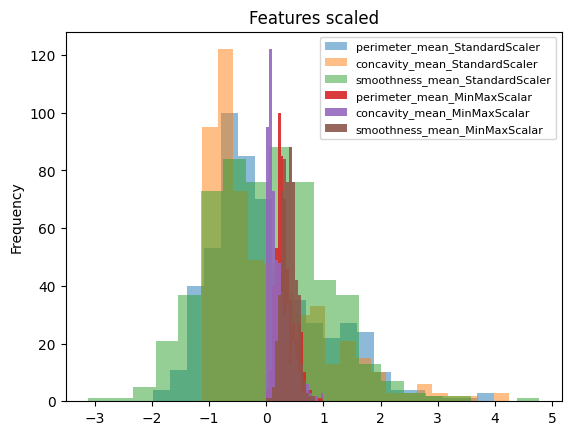

In [519]:
# Plot
plt.hist(df["perimeter_mean"], 20, histtype='bar', alpha = 0.5, label="perimeter_mean_StandardScaler")
plt.hist(df["concavity_mean"], 20, histtype='bar', alpha = 0.5, label="concavity_mean_StandardScaler")
plt.hist(df["smoothness_mean"], 20, histtype='bar', alpha=0.5, label="smoothness_mean_StandardScaler")
plt.hist(mmdf["perimeter_mean"], 20, histtype='bar', alpha = 0.9, label="perimeter_mean_MinMaxScalar")
plt.hist(mmdf["concavity_mean"], 20, histtype='bar', alpha = 0.9, label="concavity_mean_MinMaxScalar")
plt.hist(mmdf["smoothness_mean"], 20, histtype='bar', alpha=0.9, label="smoothness_mean_MinMaxScalar")
plt.gca().set(title='Features scaled', ylabel='Frequency')
plt.legend(fontsize = 8)


In [520]:
correl=data.corr(method = 'spearman')
#correl

In [521]:
correl_array=correl.to_numpy()
ind = np.diag_indices_from(correl_array)
correl_array[ind]=0
correl_array=pd.DataFrame(correl_array,columns=colnames,index=colnames)
#correl_array

C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


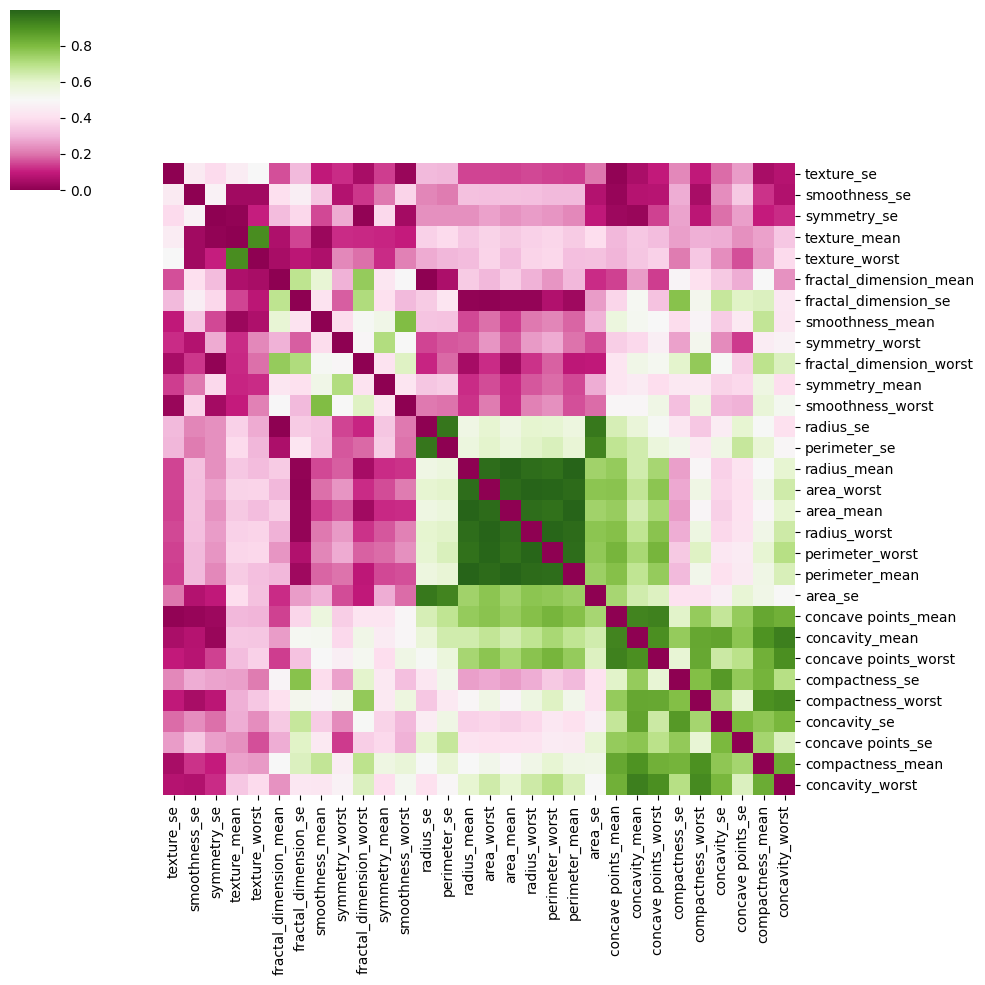

In [522]:
dataplot=sns.clustermap(abs(correl_array),cmap="PiYG",standard_scale=None,method='complete')
dataplot.ax_row_dendrogram.set_visible(False)
dataplot.ax_col_dendrogram.set_visible(False) 
# displaying heatmap
plt.show()

In [523]:
avg_correl=abs(correl_array).mean(axis=1)
indarr=np.where(avg_correl<0.35)
selectedFeatures=avg_correl.iloc[indarr]
selFeatList=(selectedFeatures.index).tolist()
print(selFeatList)
df2=df[selFeatList]
colnames2=list(df2.columns)

mmdf2=mmdf[selFeatList]
colnames2=list(mmdf2.columns)
#df2.shape


['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\praya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


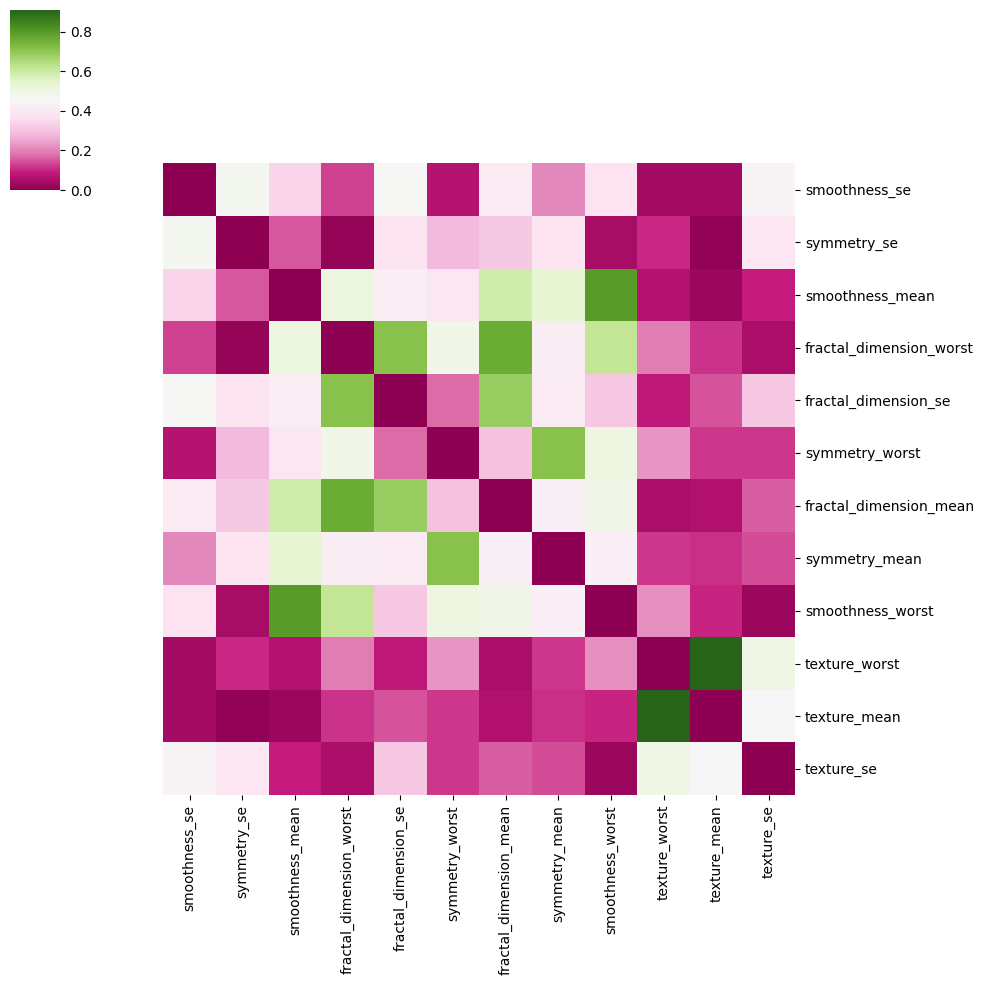

In [524]:
correl_array2= pd.DataFrame(correl_array,index=selFeatList,columns=selFeatList)
#print(correl_array2)
dataplot=sns.clustermap(abs(correl_array2),cmap="PiYG",standard_scale=None,method='complete')
dataplot.ax_row_dendrogram.set_visible(False)
dataplot.ax_col_dendrogram.set_visible(False) 
# displaying heatmap
plt.show()

In [525]:
X=df2.to_numpy()
y=class_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30,test_size=0.7)
#print(X.shape[0])
print((X_train.shape[0]/X.shape[0])*100)
X_test

mmX = mmdf2.to_numpy()
mmX_train, mmX_test, mmy_train, mmy_test = train_test_split(mmX, y, random_state = 30, test_size = 0.7)

29.876977152899826


In [526]:
test = [1,2,3,4,5,6,7,8,9,10]
y_pred = []
knn_l = []

mmy_pred = []
mmknn_l = []

for x in test:
    knn = neighbors.KNeighborsClassifier(x,weights='distance',metric='minkowski')
    mmknn = neighbors.KNeighborsClassifier(x,weights='distance',metric='minkowski')
    knn_l.append(knn)
    mmknn_l.append(mmknn)
    knn.fit(X_train, y_train)
    mmknn.fit(mmX_train, mmy_train)
    y_pred.append(knn.predict(X_test))
    mmy_pred.append(mmknn.predict(mmX_test))


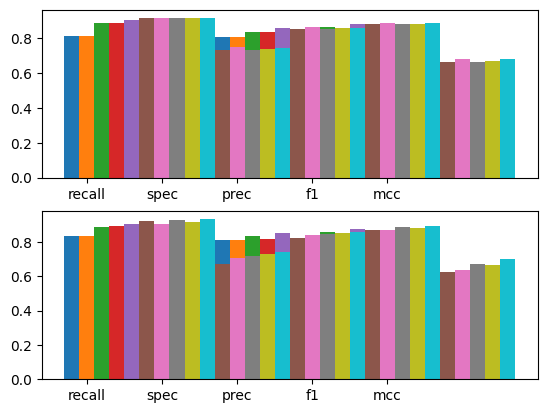

In [527]:
def mymetrics(pred_y,y_test_ref,class1,class2):
    TPctr=0
    FPctr=0
    TNctr=0
    FNctr=0
    for i in range(0,len(pred_y)):
        #print(i)
        if y_test_ref[i]==class1 and pred_y[i]==class1:
            TPctr=TPctr+1
        elif y_test_ref[i]==class1 and pred_y[i]==class2:
            FNctr=FNctr+1
        elif y_test_ref[i]==class2 and pred_y[i]==class2:
            TNctr=TNctr+1
        else:
            FPctr=FPctr+1

    classes=[class1,class2]
    CM=pd.DataFrame([[TPctr,FNctr],[TNctr,FPctr]],columns=classes,index=classes)
    recall=TPctr/(TPctr+FNctr)
    spec=TNctr/(TNctr+FPctr)
    prec=TPctr/(TPctr+FPctr)
    f1_score=2*prec*recall/(prec+recall)
    mcc=((TPctr*TNctr)-(FPctr*FNctr))/math.sqrt(((TPctr+FPctr)*(TNctr+FPctr)*(TPctr+FNctr)*(TNctr+FNctr)))
    return[recall,spec,prec,f1_score,mcc]


class1 = "B"
class2 = "M"
y_test_ref = y_test.to_numpy()
mmy_test_ref = mmy_test.to_numpy()


scores = []
mmscores = []
for y in y_pred:
    scores.append(mymetrics(y, y_test_ref, class1, class2))

for y in mmy_pred:
    mmscores.append(mymetrics(y, mmy_test_ref, class1, class2))

xax = np.arange(5)
# axis = [-0.2, 0, 0.2]
i = -0.2
plt.subplot(2,1,1)
for s in scores:
    plt.bar(xax+i, s, width=0.2)
    i += 0.2

plt.xticks(xax, ["recall", "spec", "prec", "f1", "mcc"])
# plt.legend(["k = 3", "k = 7", "k = 10"])
plt.subplot(2,1,2)

i = -0.2
for s in mmscores:
    plt.bar(xax+i, s, width=0.2) 
    i+=0.2
    
plt.xticks(xax, ["recall", "spec", "prec", "f1", "mcc"])
# plt.legend(["k = 3", "k = 7", "k = 10"])
plt.show()

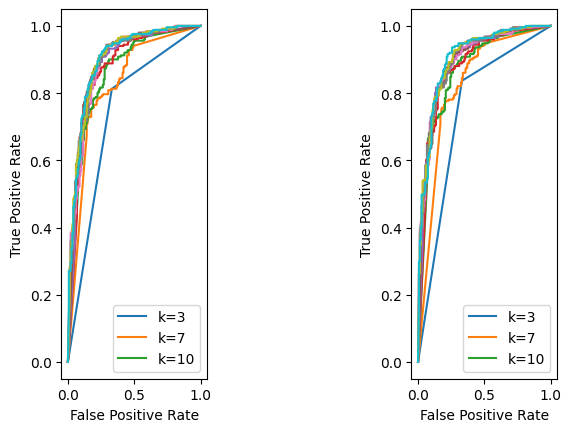

[0.7408339614514913,
 0.8263701948960913,
 0.8591848820932486,
 0.875524927317756,
 0.8876251749757725,
 0.8929686658770324,
 0.8909497146548939,
 0.896306665230968,
 0.8995369871863895,
 0.9008021966189297]

In [528]:
prob =[]
mmprob =[]

for x in knn_l:
    prob.append(x.predict_proba(X_test))
#print(probs3.shape)

for x in mmknn_l:
    mmprob.append(x.predict_proba(mmX_test))


auccuracy = []
mmauccuracy = []

plt.subplot(1,3,1)
for p in prob:
    fpr, tpr, thresholds = roc_curve(y_test, p[:,0],pos_label="B")    
    plt.plot(fpr, tpr)
    auccuracy.append(auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['k=3','k=7','k=10'])

plt.subplot(1,3,3)
for p in mmprob:
    fpr, tpr, thresholds = roc_curve(mmy_test, p[:,0],pos_label="B")    
    plt.plot(fpr, tpr)
    mmauccuracy.append(auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['k=3','k=7','k=10'])

plt.show()
auccuracy
# mmauccuracy

[0.752786152686551,
 0.8267336061160762,
 0.8690777430817271,
 0.8808549585442016,
 0.8940588995369871,
 0.8959163346613546,
 0.8981910197049641,
 0.901757833530742,
 0.90396522020028,
 0.907007106708302]

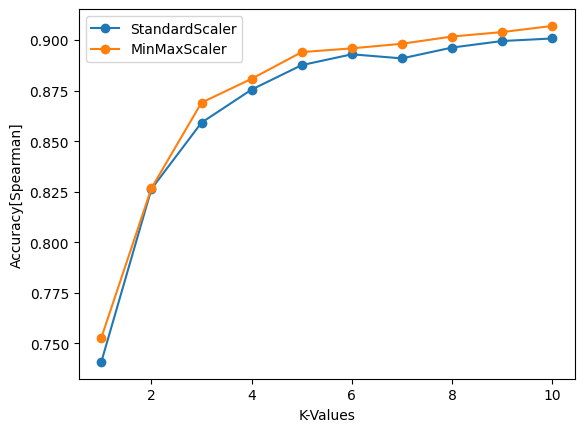

In [532]:

plt.plot(test, auccuracy,marker='o', label='StandardScaler')
plt.plot(test, mmauccuracy,marker='o', label='MinMaxScaler')
plt.xlabel("K-Values")
plt.ylabel("Accuracy[Spearman]")
plt.legend()
mmauccuracy

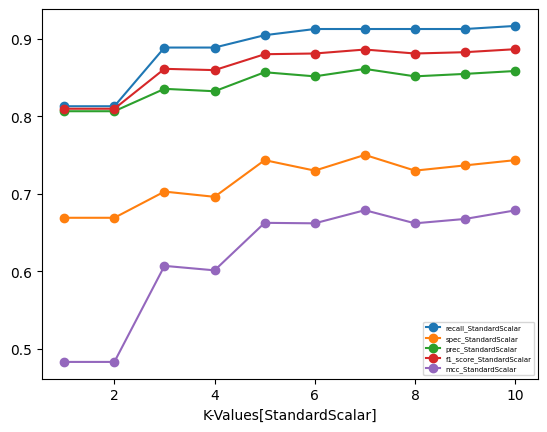

In [530]:
# recall, spec, prec, f1_score, mcc
plt.plot(test,list(map(lambda i:scores[i][0], range(10))),marker='o', label='recall_StandardScalar')
plt.plot(test,list(map(lambda i:scores[i][1], range(10))),marker='o', label='spec_StandardScalar')
plt.plot(test,list(map(lambda i:scores[i][2], range(10))),marker='o', label='prec_StandardScalar')
plt.plot(test,list(map(lambda i:scores[i][3], range(10))),marker='o', label='f1_score_StandardScalar')
plt.plot(test,list(map(lambda i:scores[i][4], range(10))),marker='o', label='mcc_StandardScalar')
plt.xlabel("K-Values[StandardScalar]")
plt.legend(fontsize=5)

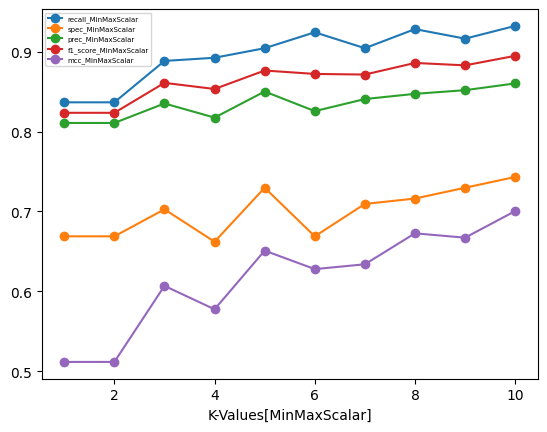

In [531]:
plt.plot(test,list(map(lambda i:mmscores[i][0], range(10))),marker='o', label='recall_MinMaxScalar')
plt.plot(test,list(map(lambda i:mmscores[i][1], range(10))),marker='o', label='spec_MinMaxScalar')
plt.plot(test,list(map(lambda i:mmscores[i][2], range(10))),marker='o', label='prec_MinMaxScalar')
plt.plot(test,list(map(lambda i:mmscores[i][3], range(10))),marker='o', label='f1_score_MinMaxScalar')
plt.plot(test,list(map(lambda i:mmscores[i][4], range(10))),marker='o', label='mcc_MinMaxScalar')
plt.xlabel("K-Values[MinMaxScalar]")
plt.legend(fontsize=5)